# 1. Which is the city that sells the most?

In [2]:
# required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [3]:
# read the user dataset
df_users = pd.read_csv('users_data.csv')

In [4]:
df_users.head(3)

,usuario,genero,edad,ciudad,gasto_mes,miembro_plus,dispositivo,tiempo_mes
0,1,Mujer,21,Valladolid,483.81,0,PC,3.30
1,2,Mujer,45,Valladolid,186.30,1,PC,6.60
2,3,Mujer,64,Murcia,396.03,0,PC,2.09


In [5]:
print(f'Users shape: {df_users.shape}')

Users shape: (500, 8)


In [6]:
# read the user dataset
df_sales = pd.read_csv('sales_data.csv')

In [7]:
df_sales.head(3)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores
0,92,Baño,8,2019-03-27 21:08:33.786039,343.53,0.5,no llego el producto,KH7
1,265,Baño,6,2019-08-08 15:19:19.873440,78.43,3.7,justo lo que esperaba,KH7
2,106,Baño,7,2020-11-10 18:56:30.101786,446.09,2.4,no llego en tiempo,Cristasol


In [8]:
print(f'Forma de las ventas: {df_sales.shape} ')

Forma de las ventas: (10000, 8) 


In [9]:
# df with users and city
df_city = df_users[[ 'usuario', 'ciudad' ]]


In [10]:
df4 = df_sales.copy()

In [11]:
# set_index('usuario').join(df_city.set_index('usuario'))
df4 = df4.set_index('usuario').join( df_city.set_index('usuario') )
#print(f'df4 shape: {df4.shape}')

In [12]:
print(f'df4 shape: {df4.shape}')

df4 shape: (10000, 8)


In [13]:
df5 = df4.reset_index();

In [14]:
df5.head(3)


,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad
0,1,Cocina,2,2019-11-30 13:17:43.023114,112.28,2.7,me gusto,Flora,Valladolid
1,1,Baño,6,2020-07-07 16:23:03.531212,479.51,1.7,la calidad no es la esperada,Don limpio,Valladolid
2,1,Baño,6,2019-01-09 10:04:02.121072,459.00,4.8,justo lo que esperaba,Cristasol,Valladolid


In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   usuario           10000 non-null  int64  
 1   categorias        10000 non-null  object 
 2   numero_articulos  10000 non-null  int64  
 3   fecha             10000 non-null  object 
 4   precio            10000 non-null  float64
 5   valoracion        10000 non-null  float64
 6   comentarios       10000 non-null  object 
 7   proveedores       10000 non-null  object 
 8   ciudad            10000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [16]:
df5['fecha'] = pd.to_datetime(df5['fecha'])

In [17]:
df5['fecha'] = df5['fecha'].dt.strftime("%Y/%m/%d")

In [37]:
df5.head(20)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad
0,1,Cocina,2,Otoño,112.28,2.7,me gusto,Flora,Valladolid
1,1,Baño,6,Verano,479.51,1.7,la calidad no es la esperada,Don limpio,Valladolid
2,1,Baño,6,Primavera,459.00,4.8,justo lo que esperaba,Cristasol,Valladolid
3,1,Zapatos,3,Otoño,435.76,3.7,justo lo que esperaba,New balance,Valladolid
4,1,Hogar,8,Primavera,410.19,2.9,llego justo a tiempo,Vileda,Valladolid
5,1,Ropa,1,Verano,403.81,0.5,muy malo,Roxy,Valladolid
6,1,Juguetes,1,Otoño,110.26,0.2,muy malo,Lego,Valladolid
7,1,Cocina,4,Primavera,184.53,4.8,muy bueno!,Oscar mayer,Valladolid
8,1,Ferreteria,2,Primavera,103.69,3.9,muy bueno!,3M,Valladolid
9,1,Ropa,3,Verano,110.48,4.6,buena relacion calidad-precio,Levis,Valladolid


In [19]:
def season (fecha):
    """ 
    El formato para la fecha Año/Mes/Dia
     """
    if (fecha in  pd.date_range(start='01/04/2019', end='30/06/2019')):
        return 'Primavera'
    elif fecha in  pd.date_range(start='01/04/2020', end='30/06/2020'):
        return 'Primavera'
    elif (fecha in  pd.date_range(start='01/07/2019', end='30/09/2019')):
        return 'Verano'
    elif (fecha in  pd.date_range(start='01/07/2020', end='30/09/2020')):
        return 'Verano'
    elif (fecha in  pd.date_range(start='01/10/2019', end='31/12/2019')):
        return 'Otoño'
    elif (fecha in  pd.date_range(start='01/10/2020', end='31/12/2020')):
        return 'Otoño'
    elif (fecha in  pd.date_range(start='01/01/2019', end='31/03/2019')):
        return 'Invierno'
    elif (fecha in  pd.date_range(start='01/01/2020', end='31/03/2020')):
        return 'Invierno'
    else: 
        return 'Fecha incorrecta'

In [20]:
df5['fecha'] = df5['fecha'].apply(season)

In [35]:
df5.head()

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad
0,1,Cocina,2,Otoño,112.28,2.7,me gusto,Flora,Valladolid
1,1,Baño,6,Verano,479.51,1.7,la calidad no es la esperada,Don limpio,Valladolid
2,1,Baño,6,Primavera,459.00,4.8,justo lo que esperaba,Cristasol,Valladolid
3,1,Zapatos,3,Otoño,435.76,3.7,justo lo que esperaba,New balance,Valladolid
4,1,Hogar,8,Primavera,410.19,2.9,llego justo a tiempo,Vileda,Valladolid


In [22]:
df5['fecha'].unique()

array(['Otoño', 'Verano', 'Primavera', 'Invierno'], dtype=object)

In [23]:
df6 = df5.copy()

In [24]:
# Df with [ 'fecha','precio', 'ciudad' ]
df6 = df6[ [ 'fecha','precio', 'ciudad' ] ]

In [25]:
df6.head(3)

,fecha,precio,ciudad
0,Otoño,112.28,Valladolid
1,Verano,479.51,Valladolid
2,Primavera,459.00,Valladolid


In [26]:
# Total de ventas por temporada
df6.groupby(['fecha']).sum()

,precio
fecha,
Invierno,22068.48
Otoño,633624.01
Primavera,1256790.17
Verano,627374.52


Text(0, 0.5, 'Ventas acumuladas en Milloes de euros')

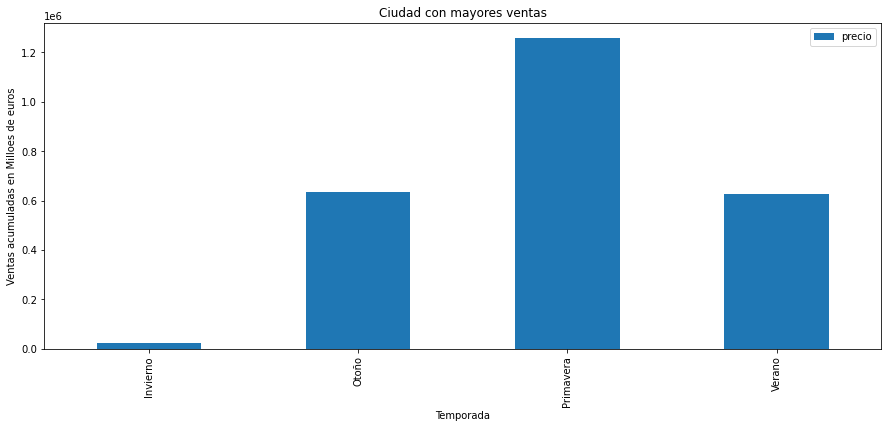

In [27]:
# Total de ventas acumuladas por temporada
df6.groupby(['fecha']).sum().plot.bar( figsize=(15,6) );
plt.title("Ciudad con mayores ventas")
plt.xlabel("Temporada")
plt.ylabel("Ventas acumuladas en Milloes de euros")

Text(0, 0.5, 'ventas acumuladas por ciudad')

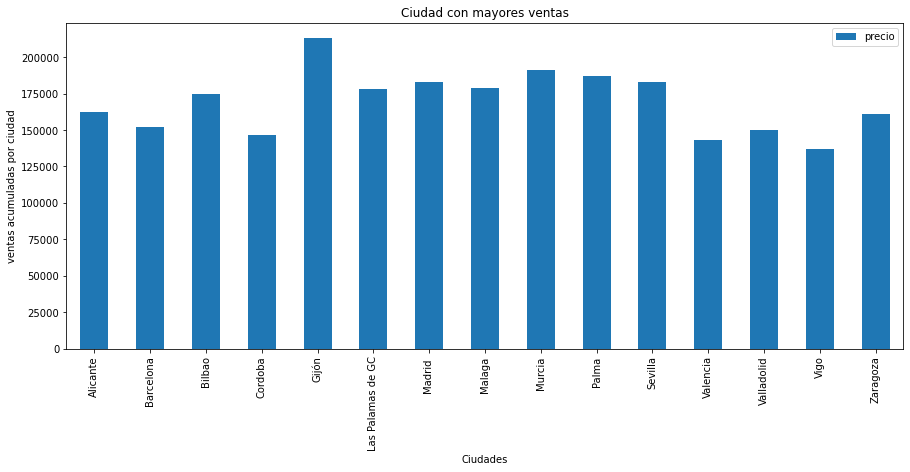

In [28]:
# Vista del total de ventas acumulado por ciudad
ventas_ciudad = df6.groupby(['ciudad']).sum()
graph_test = ventas_ciudad.plot.bar( figsize=(15, 6))
plt.title("Ciudad con mayores ventas")
plt.xlabel("Ciudades")
plt.ylabel("ventas acumuladas por ciudad")

In [29]:
df6.head(3)

,fecha,precio,ciudad
0,Otoño,112.28,Valladolid
1,Verano,479.51,Valladolid
2,Primavera,459.00,Valladolid


In [30]:
# Se reestructura la tabla
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
pd.pivot_table(data=df6, index=['ciudad'], values='precio', columns=['fecha'], aggfunc=np.sum)


fecha,Invierno,Otoño,Primavera,Verano
ciudad,,,,
Alicante,681.98,38578.61,80675.54,42272.20
Barcelona,867.92,37425.37,78635.69,35068.31
Bilbao,1375.45,44074.53,86327.32,42873.93
Cordoba,2291.59,31989.40,77409.93,34864.53
Gijón,1523.96,56291.34,104779.09,50341.03
Las Palamas de GC,2144.53,42845.99,87868.17,45563.07
Madrid,1856.02,44365.08,84636.18,51695.77
Malaga,2318.06,37930.53,91100.02,47323.97
Murcia,1512.54,50490.31,87061.44,52329.49


In [31]:
df7 = pd.pivot_table(data=df6, index=['ciudad'], values='precio', columns=['fecha'], aggfunc=np.sum)

In [32]:
df7.shape

(15, 4)

Text(0, 0.5, 'Accumulated sales')

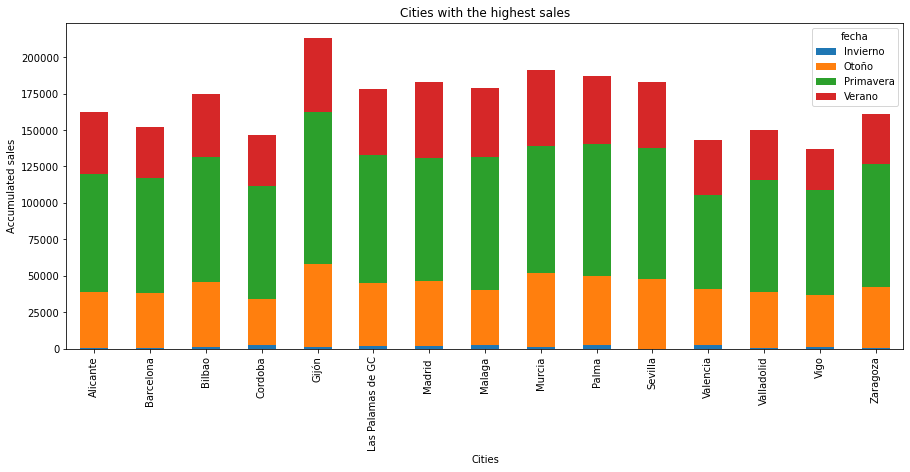

In [33]:
# Vista del acumulado de ventas por temporada,
# durante los dos años de análisis

graph1 = df7.plot.bar(stacked=True, figsize=(15, 6))
plt.title("Cities with the highest sales")
plt.xlabel("Cities")
plt.ylabel("Accumulated sales")


Text(0, 0.5, 'Porcentaje de ventas')

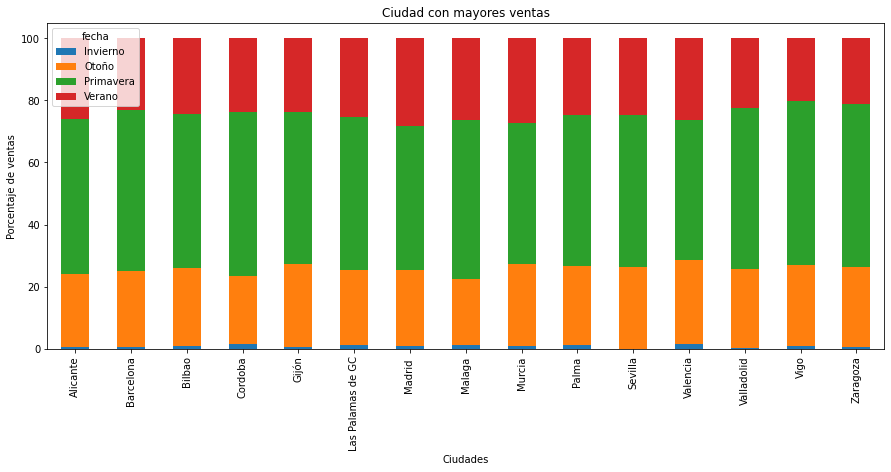

In [34]:
# Vista del acumulado de ventas por temporado,
# durante los dos años de análisis

stacked_data = df7.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(15, 6))
plt.title("Ciudad con mayores ventas")
plt.xlabel("Ciudades")
plt.ylabel("Porcentaje de ventas")